In [23]:
from ast import increment_lineno
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots that will be created

# Read the data
df = pd.read_csv('movies.csv')




In [24]:
# Peek at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [25]:
# Missing data check
df.isnull().sum() / df.shape[0] * 100

,0
name,0.000000
rating,1.004173
genre,0.000000
year,0.000000
released,0.026082
score,0.039124
votes,0.039124
director,0.000000
writer,0.039124
star,0.013041


In [26]:
# Median filling for numeric values
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Mode filling for categoric values
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-2014508322.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2014508322.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [27]:
# Column Data types
df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [28]:
# Datatype Change
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [29]:
# Correcting year column
df['correctyear'] = df['released'].astype(str).str[:4]

#Droping old year column
df.drop(columns=['year'],inplace=True)

In [30]:
df.sort_values(by=['gross'], ascending=False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0,Febr
7625,The Untold Story,R,Comedy,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0,Janu
7580,Run with the Hunted,Not Rated,Crime,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0,June
2417,Madadayo,R,Drama,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,Apri


In [31]:
# Droping Duplicates
df.drop_duplicates(inplace=True)

Text(0, 0.5, 'Gross Earnings')

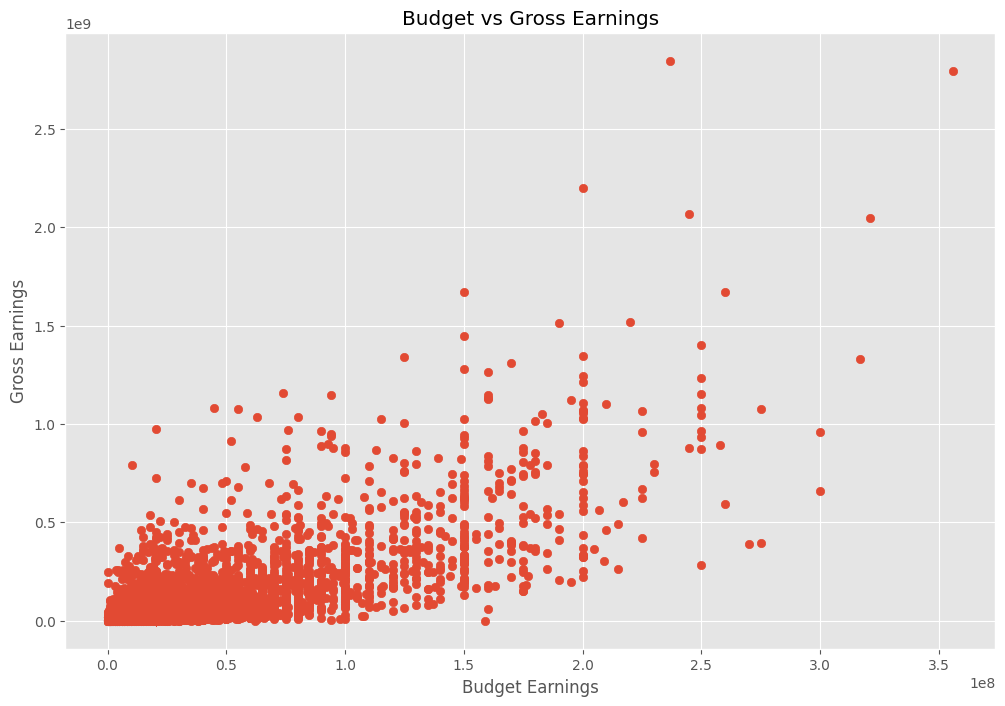

In [32]:
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget Earnings')
plt.ylabel('Gross Earnings')

Text(0, 0.5, 'Gross Earnings')

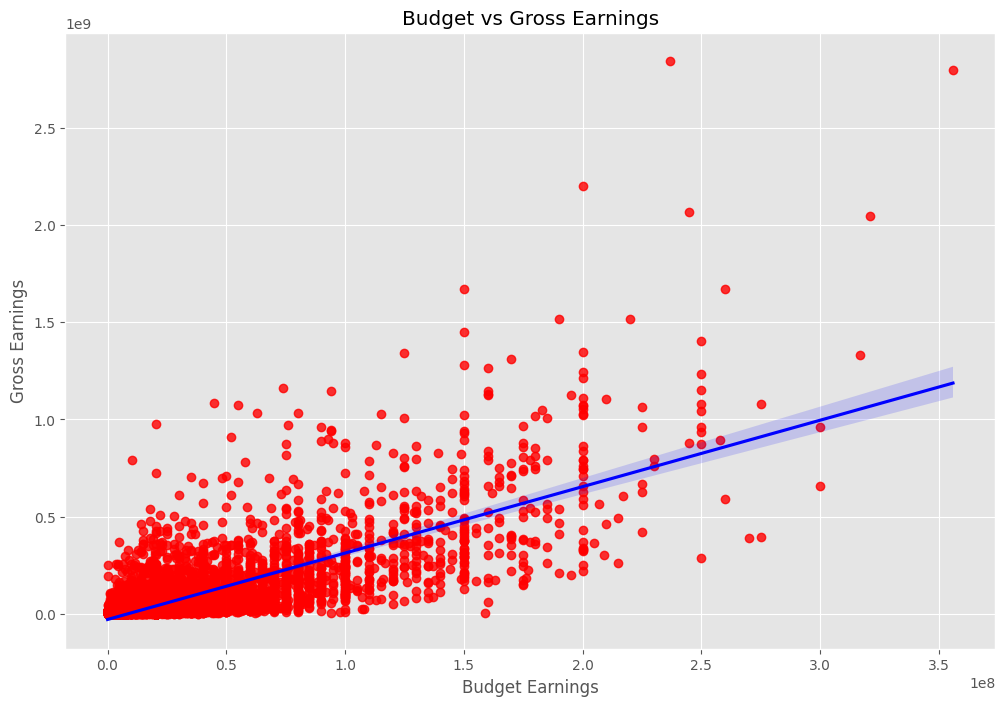

In [33]:
# Ploting the budget vs gross with Seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget Earnings')
plt.ylabel('Gross Earnings')

Text(120.72222222222221, 0.5, 'Movie Features')

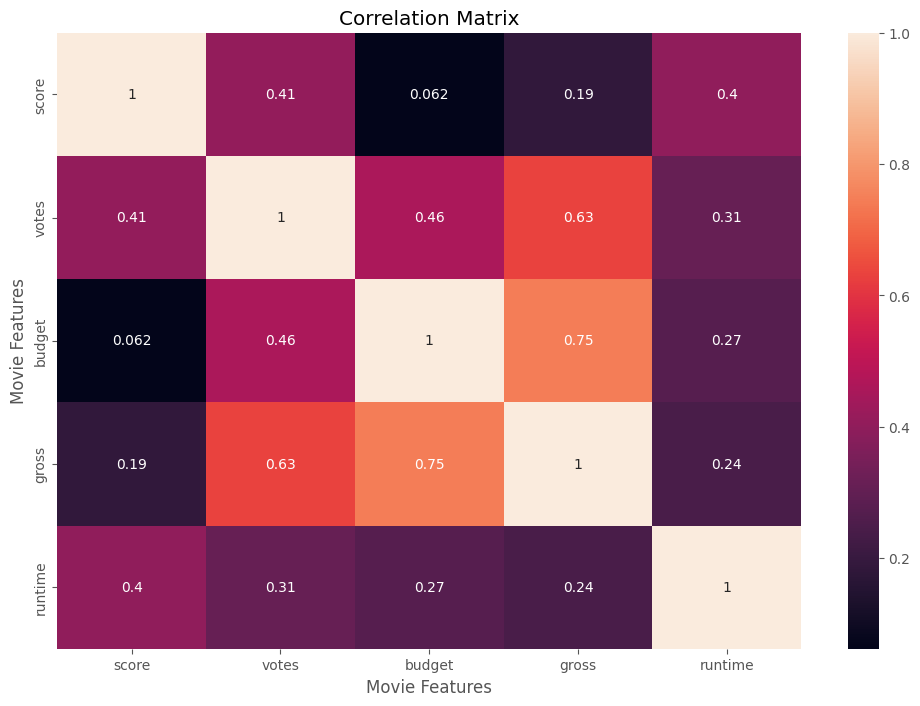

In [34]:
# Correlation Matrix Using just Numerical Values
correlation_matrix = df.select_dtypes(include=['number']).corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [35]:
# Labeling Non-Numeric Variables for Future Use
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

df_le = df.copy()

for col in cat_cols:
    df_le[col] = LabelEncoder().fit_transform(df[col])

corr = df_le.corr()


Text(120.72222222222221, 0.5, 'Movie Features')

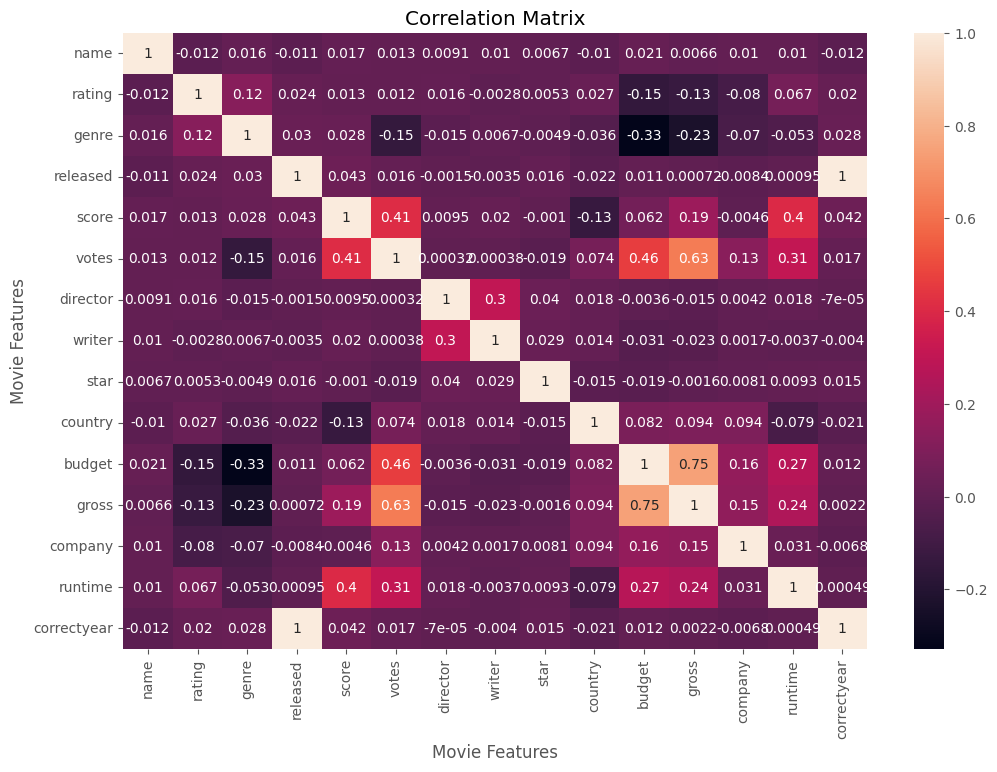

In [36]:
# Making a Comprehensive Correlation Matrix
correlation_matrix = df_le.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [37]:
# Pairing Variables
correlation_matrix = df_le.corr(method='pearson')
corr_pairs = correlation_matrix.unstack()
corr_pairs

name         name           1.000000
             rating        -0.012441
             genre          0.016355
             released      -0.011087
             score          0.017105
                              ...   
correctyear  budget         0.012436
             gross          0.002170
             company       -0.006845
             runtime        0.000488
             correctyear    1.000000
Length: 225, dtype: float64

In [38]:
# Sorting Variable Pairs
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

,,0
genre,budget,-0.328484
budget,genre,-0.328484
gross,genre,-0.233385
genre,gross,-0.233385
rating,budget,-0.148543
...,...,...
gross,gross,1.000000
budget,budget,1.000000
company,company,1.000000
runtime,runtime,1.000000


In [39]:
# Finding Strong Correlation Pairs
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

,,0
gross,votes,0.632120
votes,gross,0.632120
gross,budget,0.745881
budget,gross,0.745881
released,correctyear,0.995317
correctyear,released,0.995317
score,score,1.000000
votes,votes,1.000000
rating,rating,1.000000
name,name,1.000000


In [40]:
# Strong Correlation Pairs: Gross Earnings-Votes, Budget-Gross Earnings